In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
le = LabelEncoder()
for col in ['sex','smoker','region']:
    df[col] = le.fit_transform(df[col])
    

In [14]:
X = df.drop('charges', axis = 1 ) 
y = df['charges'] 

In [19]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [41]:
ls = StandardScaler() 
ls.fit(X_train) 
X_train = ls.transform(X_train)
X_test = ls.transform(X_test) 


In [42]:
X_train

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]], shape=(1070, 6))

In [43]:
ln = LinearRegression() 
ln.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
ln.coef_

array([ 3.61610865e+03, -9.39295411e+00,  2.02830858e+03,  5.16662566e+02,
        9.55714338e+03, -3.02387980e+02])

In [45]:
ln.intercept_

np.float64(13346.089736364485)

In [46]:
X_test[0,:]

array([ 0.40114007, -1.0246016 , -0.89153925,  0.73433626, -0.50874702,
       -1.35325561])

In [47]:
X_test[0,:1]

array([0.40114007])

In [48]:
ln.predict([X_test[0,:]])

array([8924.40724442])

In [49]:
ln.predict(X_test)

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [50]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [51]:
ln.score(X_test,y_test)

0.7833463107364537

In [57]:
from sklearn.linear_model import Ridge, Lasso
rd = Ridge() 
rd.fit(X_train,y_train) 
rd.score(X_test,y_test)

0.7833037457661383

In [59]:
la = Lasso(alpha = 2) 
la.fit(X_train,y_train) 
la.score(X_test,y_test)

0.7833123051637778

In [64]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [65]:
ply = PolynomialFeatures(degree= 2 ) 
ply.fit(X_train) 
X_train_ply =ply.transform(X_train) 
x_test_ply  = ply.transform(X_test) 

In [66]:
X_train_ply.shape,x_test_ply.shape

((1070, 28), (268, 28))

In [67]:
li = LinearRegression() 
li.fit(X_train_ply,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
li.score(x_test_ply,y_test,)

0.867756671853774

In [69]:
predd = li.predict(x_test_ply) 
predd

array([11180.05794894,  6571.37648261, 34066.03843575, 10340.24620623,
       29435.50134732,  4497.67727426,  3501.30474372, 15878.01204718,
        3871.05897727, 11677.49503252, 19961.62382948,  9005.21276566,
        5702.56542705, 50218.75435669, 53435.71428561, 46027.13082605,
       10603.05179019, 42472.83009684,  9779.90550637, 26615.72767717,
        3817.52055781,  8720.0735097 ,  2383.74808281,  5049.93039119,
       13018.15740271, 12163.55567139, 14056.27089051,  8105.69534609,
       11930.40026614,  2603.92513679,  8864.17652065, 12905.70955861,
        3236.16189446,  7189.65115402,  4101.78836763,  8986.33290582,
        3895.79869493,  8659.17902433, 25732.20557691, 37436.60467618,
        5051.97334873,  4634.7024048 , 12958.6475366 , 13009.35291337,
        6386.25184165, 14589.88855976,  6592.19835496,  5359.96670316,
       40583.3116814 ,  5761.74862418, 15208.49659966,  3383.33692383,
        8170.96973094,  3489.82866757, 12551.60362485, 12438.54987206,
      

In [70]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predd) 
rmse = np.sqrt(mse) 
mse,rmse

(20530608.942951933, np.float64(4531.071500534055))

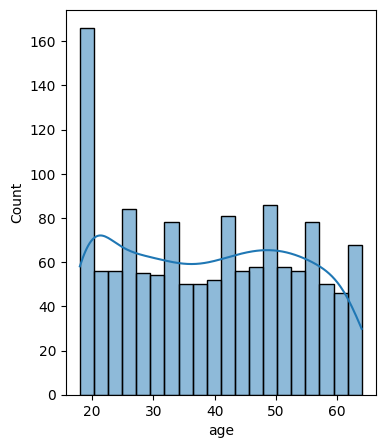

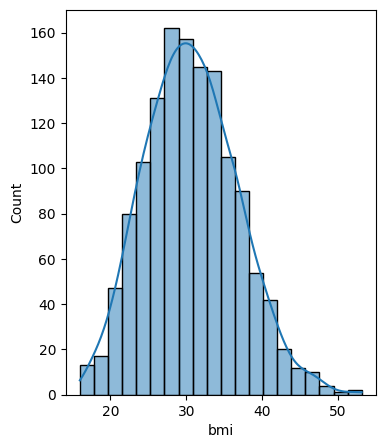

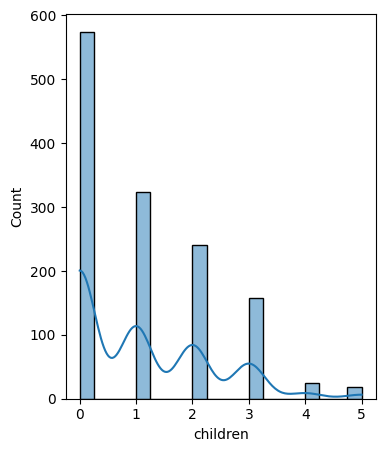

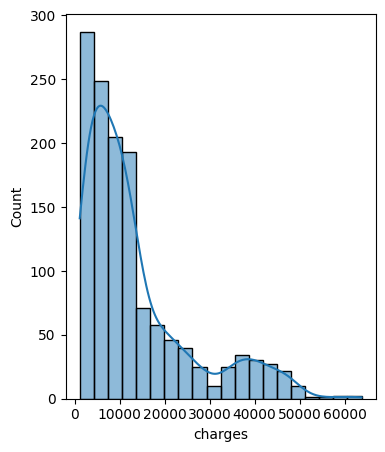

In [16]:
numeri_colume = ['age','bmi', 'children', 'charges']
for col in numeri_colume:
     plt.figure(figsize=(4,5))
     sns.histplot(df[col],kde=True,bins= 20)  

<Axes: xlabel='sex', ylabel='count'>

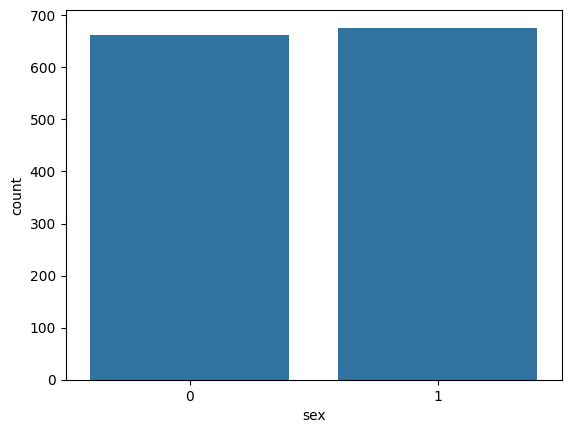

In [17]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

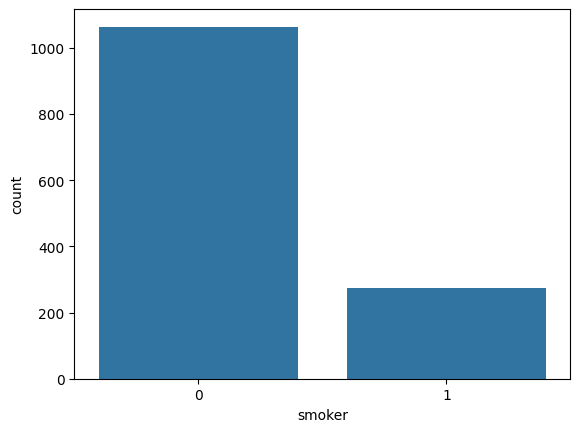

In [18]:
sns.countplot(x = df['smoker'])

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

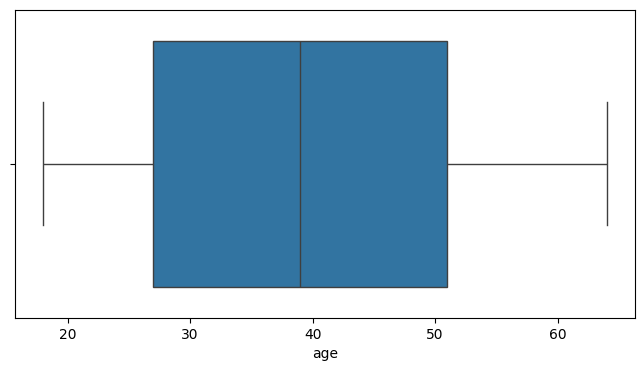

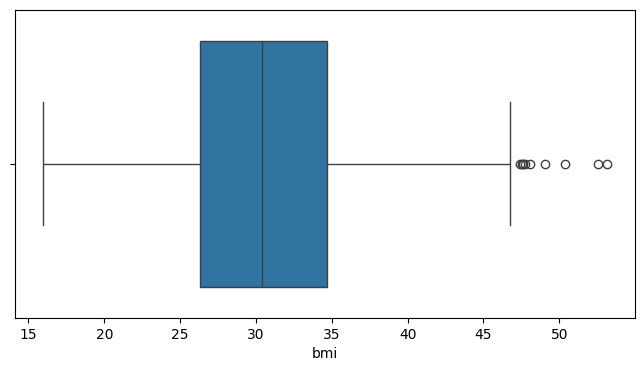

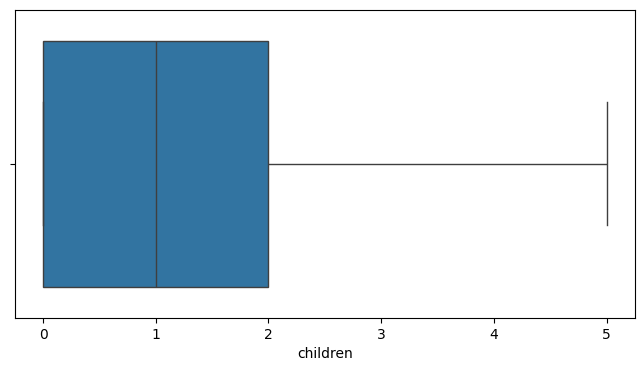

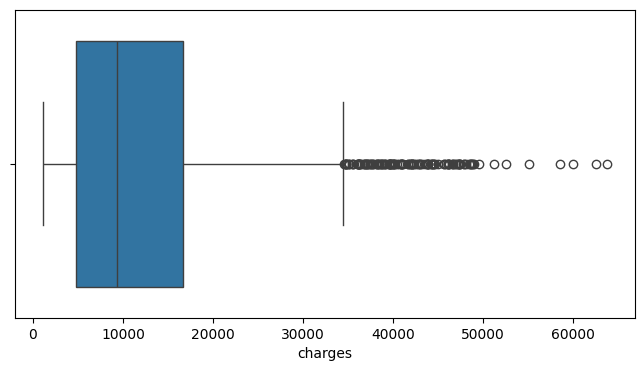

In [20]:
for col in numeri_colume:
    plt.figure(figsize=(8,4))
    sns.boxplot(x = df[col] )
    

In [21]:
df.corr

<bound method DataFrame.corr of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]>

<Axes: >

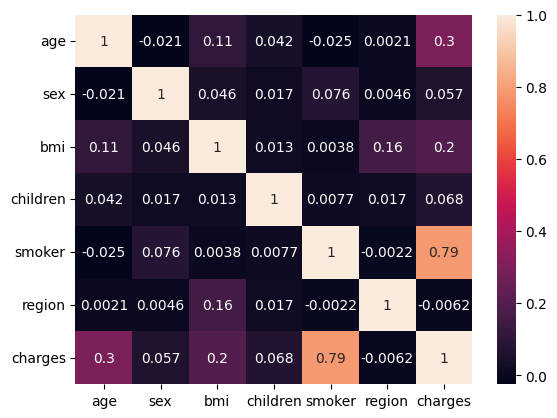

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True)